In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data from the file
data = pd.read_csv('tested.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
#data.drop('Name', axis=1, inplace=True)
data.drop('Ticket', axis=1, inplace=True)
data.drop('Fare', axis=1, inplace=True)
data.drop('Cabin', axis=1, inplace=True)

In [5]:
from sklearn.model_selection import train_test_split
#split the data into train and test set
train,test = train_test_split(data, test_size=0.30, random_state=0)
#save the data
train.to_csv('train.csv',index=False)
test.to_csv('test.csv',index=False)

In [6]:
#from google.colab import files
#files.download('train.csv')
#files.download('test.csv')

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 292 entries, 96 to 172
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  292 non-null    int64  
 1   Survived     292 non-null    int64  
 2   Pclass       292 non-null    int64  
 3   Name         292 non-null    object 
 4   Sex          292 non-null    object 
 5   Age          236 non-null    float64
 6   SibSp        292 non-null    int64  
 7   Parch        292 non-null    int64  
 8   Embarked     292 non-null    object 
dtypes: float64(1), int64(5), object(3)
memory usage: 22.8+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126 entries, 360 to 297
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  126 non-null    int64  
 1   Survived     126 non-null    int64  
 2   Pclass       126 non-null    int64  
 3   Name         126 non-null    object 
 4   Sex          126 non-null    object 
 5   Age          96 non-null     float64
 6   SibSp        126 non-null    int64  
 7   Parch        126 non-null    int64  
 8   Embarked     126 non-null    object 
dtypes: float64(1), int64(5), object(3)
memory usage: 9.8+ KB


In [9]:
train = train.drop(['PassengerId'], axis=1)
test = test.drop(['PassengerId'], axis=1)

In [10]:
# delete unnecessary feature from dataset
#train.drop('Name', axis=1, inplace=True)
#test.drop('Name', axis=1, inplace=True)

In [11]:
# sum of missing values: by default axis = 0
train.isnull().sum()

Survived     0
Pclass       0
Name         0
Sex          0
Age         56
SibSp        0
Parch        0
Embarked     0
dtype: int64

In [12]:
test.isnull().sum()

Survived     0
Pclass       0
Name         0
Sex          0
Age         30
SibSp        0
Parch        0
Embarked     0
dtype: int64

In [13]:
train.fillna({"Age":train['Age'].mean()},inplace=True)
test.fillna({"Age":train['Age'].mean()},inplace=True)

In [14]:
test.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [15]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch
count,292.000000,292.000000,292.000000,292.000000,292.000000
mean,0.332192,2.297945,30.489746,0.407534,0.414384
std,0.471808,0.827115,12.950306,0.723925,1.075915
min,0.000000,1.000000,0.170000,0.000000,0.000000
25%,0.000000,2.000000,23.000000,0.000000,0.000000
50%,0.000000,3.000000,30.489746,0.000000,0.000000
75%,1.000000,3.000000,36.000000,1.000000,0.000000
max,1.000000,3.000000,76.000000,5.000000,9.000000


In [16]:
#Converting “Age” from float to int64
data = [train, test]

for dataset in data:
    dataset['Age'] = dataset['Age'].fillna(0)
    dataset['Age'] = dataset['Age'].astype(int)

In [17]:
#Convert ‘Sex’ feature into numeric.
genders = {"male": 0, "female": 1}
data = [train, test]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].fillna('unknown')
    dataset['Sex'] = dataset['Sex'].map(genders)

In [18]:
#Convert ‘Embarked’ feature into numeric.
ports = {"S": 0, "C": 1, "Q": 2}
data = [train, test]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [19]:
# create a combined group of both datasets
combine = [train, test]

# extract a title for each Name in the
# train and test datasets
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train['Title'], train['Sex'])

# replace various titles with more common names
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Capt', 'Col','Don', 'Dr', 'Major','Rev', 'Jonkheer', 'Dona'],'Rare')
    dataset['Title'] = dataset['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

# map each of the title groups to a numerical value
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3,"Master": 4, "Royal": 5, "Rare": 6}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

In [20]:
train = train.drop(['Name'], axis=1)
test = test.drop(['Name'], axis=1)

In [21]:
data = [train, test]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

In [22]:
data = [train, test]
for dataset in data:
    dataset['Age_Class']= dataset['Age']* dataset['Pclass']

In [23]:
data = [train, test]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
train['not_alone'].value_counts()

1    179
0    113
Name: not_alone, dtype: int64

In [24]:
train.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Title,Age_Class,relatives,not_alone
96,1,1,1,6,1,0,0,3,6,1,0
381,0,3,0,3,0,0,2,1,9,0,1
89,0,2,0,0,1,1,0,4,0,2,0
233,0,3,0,4,0,0,2,1,12,0,1
191,0,1,0,4,0,0,0,1,4,0,1
354,1,3,1,0,1,2,0,2,0,3,0
253,0,3,0,3,0,0,0,1,9,0,1
92,1,1,1,3,1,2,0,3,3,3,0
240,1,1,1,6,0,0,1,3,6,0,1
194,0,2,0,0,0,2,0,4,0,2,0


In [37]:
train['Sex'].value_counts(dropna = False)

0    195
1     97
Name: Sex, dtype: int64

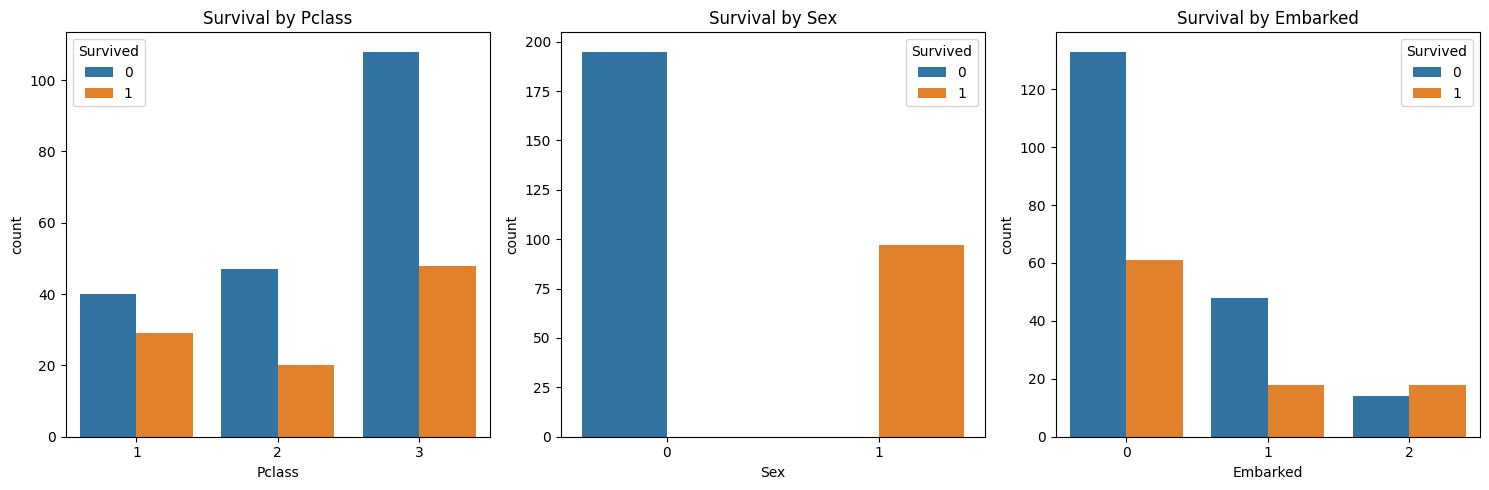

In [30]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Create count plots for 'Pclass', 'Sex', and 'Embarked'
sns.countplot(x='Pclass', hue='Survived', data=train, ax=axes[0])
sns.countplot(x='Sex', hue='Survived', data=train, ax=axes[1])
sns.countplot(x='Embarked', hue='Survived', data=train, ax=axes[2])

# Set titles for subplots
axes[0].set_title('Survival by Pclass')
axes[1].set_title('Survival by Sex')
axes[2].set_title('Survival by Embarked')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

In [31]:
from sklearn.model_selection import train_test_split

# Drop the Survived and PassengerId
# column from the trainset
x_train = train.drop(['Survived'], axis=1)
y_train = train["Survived"]
x_val = test.drop(['Survived'], axis=1)
y_val = test["Survived"]

In [32]:
x_val.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked,Title,Age_Class,relatives,not_alone
360,3,0,1,8,2,0,4,3,10,0
170,3,0,4,0,0,0,1,12,0,1
224,1,1,6,0,0,1,3,6,0,1
358,3,0,4,0,0,2,1,12,0,1
309,3,1,6,1,0,0,3,18,1,0


In [33]:
x_train.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked,Title,Age_Class,relatives,not_alone
96,1,1,6,1,0,0,3,6,1,0
381,3,0,3,0,0,2,1,9,0,1
89,2,0,0,1,1,0,4,0,2,0
233,3,0,4,0,0,2,1,12,0,1
191,1,0,4,0,0,0,1,4,0,1


In [34]:
y_train.head(10)

96     1
381    0
89     0
233    0
191    0
354    1
253    0
92     1
240    1
194    0
Name: Survived, dtype: int64

In [42]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)
Y_pred = svc.predict(x_val)
acc_svc = round(svc.score(x_train, y_train), 2)
acc_svc

0.95

In [48]:
pred_y = svc.predict(x_val)
act_predict= pd.DataFrame({
    'Actual': y_val.values.flatten(),
    'Predict': Y_pred.flatten()
})

act_predict.head(5)

,Actual,Predict
0,0,0
1,0,0
2,1,1
3,0,0
4,1,1


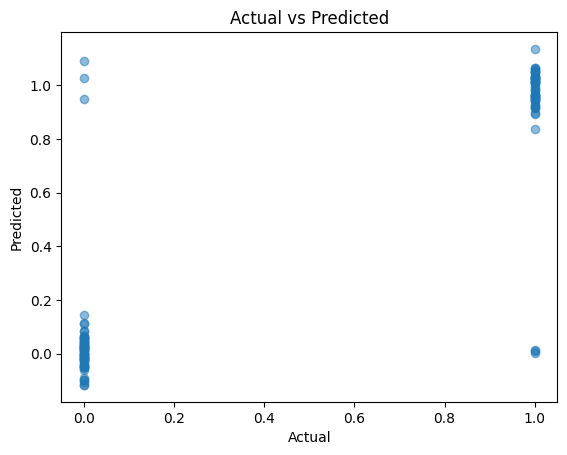

In [51]:
predicted_values_noisy = pred_y + np.random.normal(0, 0.05, size=len(pred_y))

plt.scatter(y_val, predicted_values_noisy, alpha=0.5)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

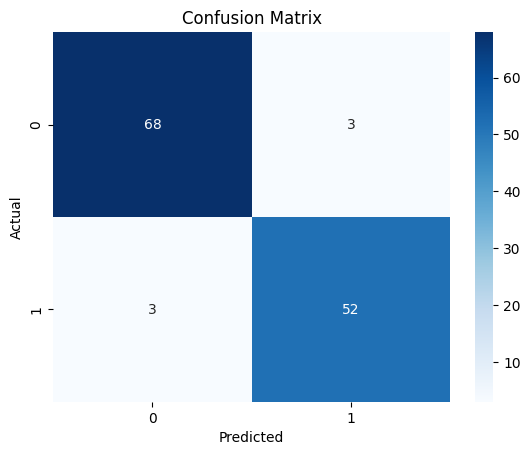

In [52]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_val, pred_y)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()